# Machine Learning: Homework 1

This is the notebook containing the code and some text explanation of the first homework of Machine Learning Course, included in the Master Degree of "Artificial Intelligence and Robotics", La Sapienza University of Rome.

- **Professor**: Luca Iocchi
- **Author**: Alessia Pontiggia
- **Student ID**: 1892079
- **Report**: [latex](https://www.overleaf.com/project/65413de71f020f122f36a5b4)


# Task explanation

The task of this first homework is a multiclass (10 classes) classification problem on two different datasets. The methodology and solutions used are explained following a sequential order. As the assignment requires, no neural network models have been used.

# Import

In order to use libraries and functions not locally defined, some imports are necessary.


In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import time
import warnings
print("Libraries imported successfully\n")
# To ignore all warnings
warnings.filterwarnings("ignore")
drive.mount('/content/drive')

Libraries imported successfully

Mounted at /content/drive


# Dataset: Preprocessing

In this section some operations of preprocessing on datasets are done. Below, the functions are reported:

- **Loading**: In order to use datasets, their download is required.
- **Distribution**: Often, performances are affected by the way data is distribute, so we want to plot the distribution.
- **Normalization**: It is useful to help having training stability
- **Balance**: In many machine learning tasks it is useful having a balanced dataset. In this way the training process is not affected by the number of samples belonging to one class wrt another. (E.g. if the dataset has few samples for class i, then the learning process for that label is hard and can produce some errors in test step)
- **Splitting**: In order to perform training, validation and test steps we need to separate the dataset into training, validation and test sets in a random way

In [ ]:
def load_data(csv_filepath):

  data = pd.read_csv(csv_filepath)

  # Headers' list:
  headers = data.columns # 'x' for inputs, 'y' for labels

  # Extract DataFrames based on the headers:
  x_data = data[headers[0]]

  # Convert an array-like string (e.g., '[0.02, 1.34\n, 2.12, 3.23\n]')
  # into an array of floats (e.g., [0.02, 1.34, 2.12, 3.23]):
  X_data = [[float(feature) for feature in feature_vec.replace('[', '').replace(']', '').split()] for feature_vec in x_data]

    # convert data into numpy arrays
  X = np.array(X_data)

  if len(headers)>1:
    Y_data = data[headers[1]]
    Y = np.array(Y_data)
  else:
    Y = None

  return X, Y

In [ ]:
def visualize_data(X):
  df = pd.DataFrame(X)
  pca = PCA(n_components=2)  # Reduce to 2 dimensions
  reduced_data = pca.fit_transform(df)
  tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
  reduced_data = tsne.fit_transform(df)
  plt.figure(figsize=(8, 6))
  # colors = ['magenta' ,'red', 'green', 'blue', 'purple', 'orange', 'grey', 'yellow','black', 'cyan']
  plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=10)  # Adjust 's' for marker size
  plt.title('2D Visualization of Data')
  plt.xlabel('Dimension 1')
  plt.ylabel('Dimension 2')
  plt.show()
  return

In [ ]:
def plot_balance(Y, title):
  plt.figure(figsize=(8, 5))  # Adjust the figure size if needed
  plt.hist(Y, bins=30, alpha=0.7)
  plt.title(title)
  plt.xlabel('Labels')
  plt.ylabel('# Samples')
  plt.show()
  return

In [ ]:
def random_samples(X, Y, dim):
  y_idx = []
  x = []
  for i in range(0,10):
    indeces = np.where(Y == i)
    choice = random.choices(indeces[0], k=dim)
    for idx in choice:
      x.append(X[idx])
  return x

In [ ]:
def plot_distribution(X, title):
  plt.hist(X, bins=30, color=['blue' for _ in range(100)] , alpha=0.7)
  plt.title(title)
  plt.xlabel('Values')
  plt.ylabel('# Samples')
  plt.show()
  return

In [ ]:
def normalize_data(X):
  scaler = StandardScaler()
  normalized_data = scaler.fit_transform(X)
  return normalized_data

## Dataset 1

### Loading


In [ ]:
path_dataset1 = "/content/drive/MyDrive/AIRO/anno1/semestre1/ML/homework1/data/Copia di dataset1.csv"
X1,Y1 = load_data(path_dataset1)

In [ ]:
X1_size = X1.shape
Y1_size = Y1.shape
print(f"The size of X dataset is {X1_size}, so it has {X1_size[0]} examples and each sample has {X1_size[1]} features.")
print(f"The size of Y dataset is {Y1_size}, so, as X, it has {Y1_size[0]} examples and each sample has a label.")
print(f"Labels go from {np.min(Y1)} to {np.max(Y1)}")

The size of X dataset is (50000, 100), so it has 50000 examples and each sample has 100 features.
The size of Y dataset is (50000,), so, as X, it has 50000 examples and each sample has a label.
Labels go from 0 to 9


In [ ]:
idx = random.randint(0, len(X1)-1)
print(X1[idx])
df = pd.DataFrame(X1[idx])

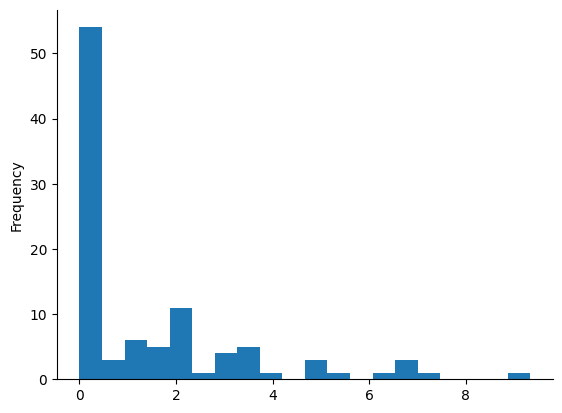

In [ ]:
df[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

### Visualization


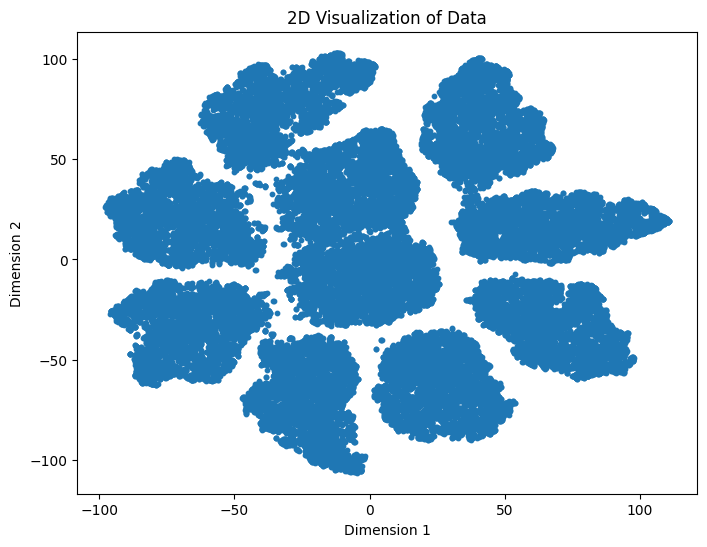

In [ ]:
visualize_data(X1)

### Distribution

For computational purposes, the distribution of data is taken over a randomic and well-balanced subset of X.  

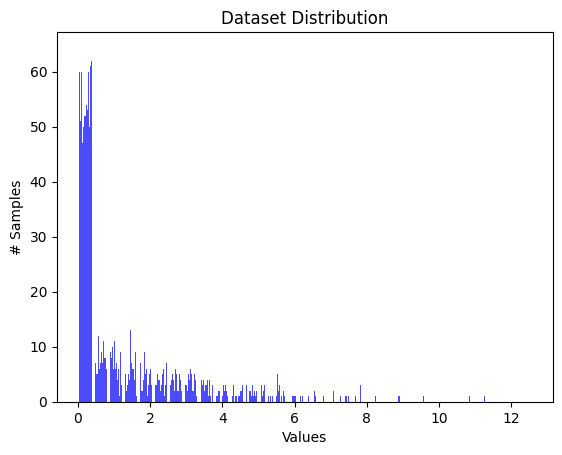

In [ ]:
x_random = random_samples(X1,Y1,10)
plot_distribution(x_random, 'Dataset Distribution')

As the plot states, there's a remarkable variation of values.

### Normalization


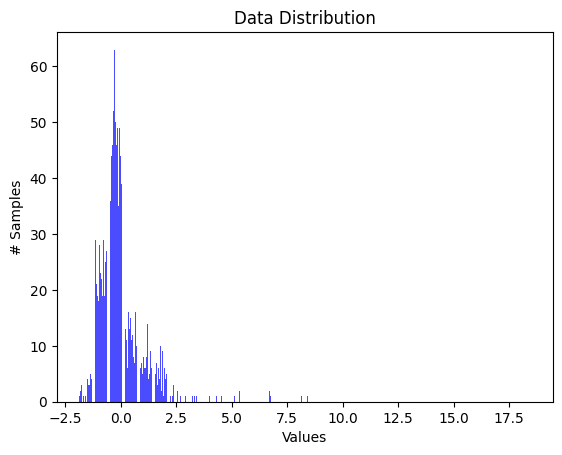

In [ ]:
X1 = normalize_data(X1)
x_random = random_samples(X1,Y1,10)
plot_distribution(x_random, "Data Distribution")

### Balance

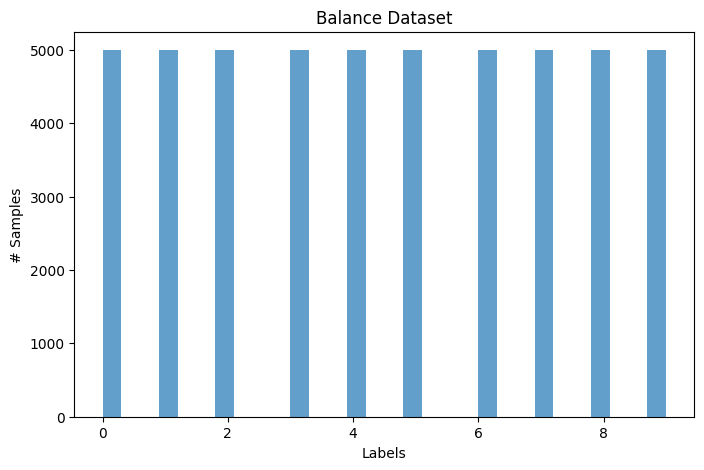

In [ ]:
plot_balance(Y1, "Balance Dataset")

As the histogram denotes, the dataset1 is perfectly balanced: each label is associated to 5000 samples.

### Splitting


In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

In [ ]:
print(f"Training set size {X1_train.shape}")
print(f"Test set size {X1_test.shape}")

Training set size (40000, 100)
Test set size (10000, 100)


## Dataset 2

### Loading

In [ ]:
path_dataset2 = "/content/drive/MyDrive/AIRO/anno1/semestre1/ML/homework1/data/Copia di dataset2.csv"
X2,Y2 = load_data(path_dataset2)

In [ ]:
X2_size = X2.shape
Y2_size = Y2.shape
print(f"The size of X dataset is {X2_size}, so it has {X2_size[0]} examples and each sample has {X2_size[1]} features.")
print(f"The size of Y dataset is {Y2_size}, so, as X, it has {Y2_size[0]} examples and each sample has a label.")
print(f"Labels go from {np.min(Y2)} to {np.max(Y2)}")

The size of X dataset is (50000, 1000), so it has 50000 examples and each sample has 1000 features.
The size of Y dataset is (50000,), so, as X, it has 50000 examples and each sample has a label.
Labels go from 0 to 9


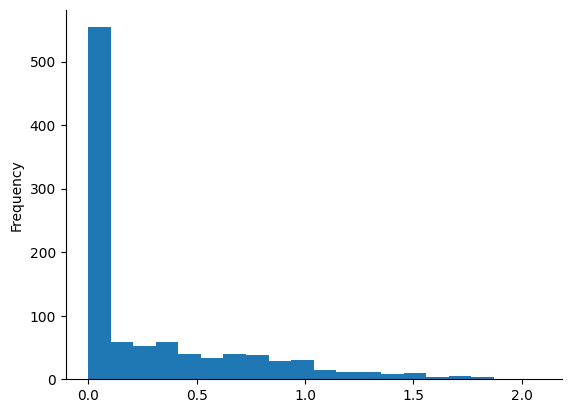

In [ ]:
idx = random.randint(0, len(X2)-1)
df = pd.DataFrame(X2[idx])
df[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

### Visualization


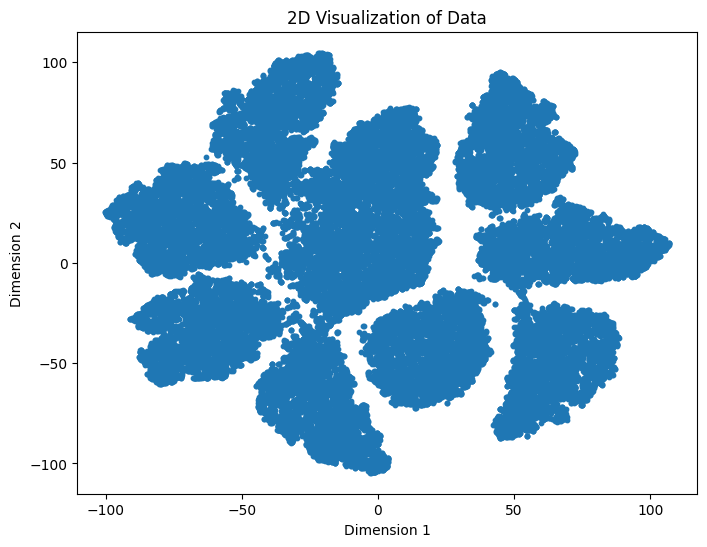

In [ ]:
visualize_data(X2)

### Distribution

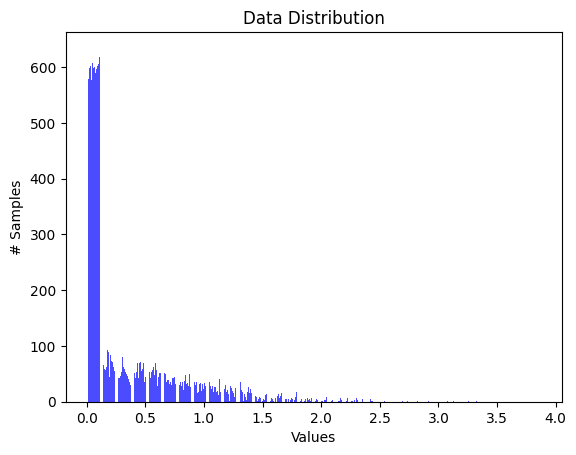

In [ ]:
x_random = random_samples(X2,Y2,10)
plot_distribution(x_random, 'Data Distribution')

### Normalization

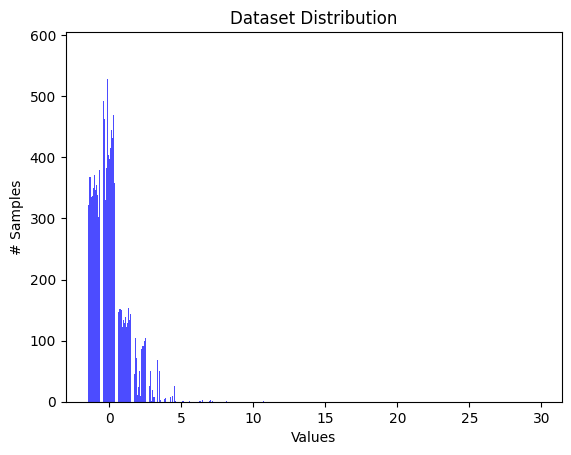

In [ ]:
X2 = normalize_data(X2)
x_random = random_samples(X2,Y2,10)
plot_distribution(x_random, "Dataset Distribution")

### Balance

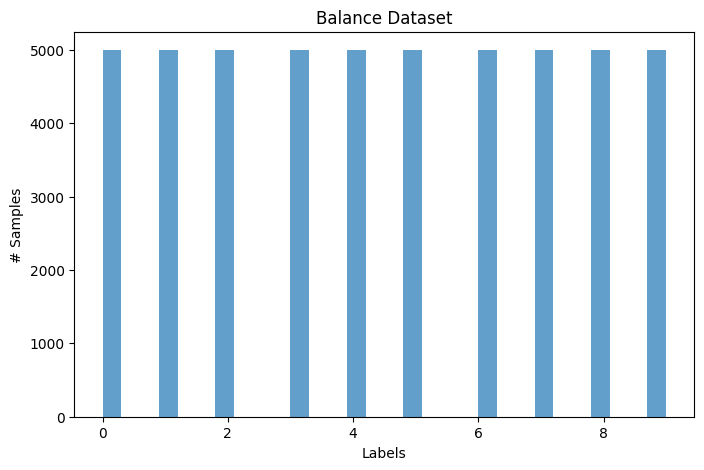

In [ ]:
plot_balance(Y2, "Balance Dataset")

### Splitting

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

# Models

To face a classification task, some models will be tested and modified to get the best results:

1.   Decision Trees
2.   Logistic Regression
3. Support Vector Machine
4. Ensamble Methods

Below, there are reported the functions used to find best models and other stuff.



In [ ]:
def KFold_Splitting(X, Y, K, idx):

  dim_fold = int((X.shape[0])/K)
  total_dim = int(X.shape[0])

  # indexes for validation set
  start_val_idx = idx*dim_fold
  end_val_idx = start_val_idx + dim_fold

  X_val = X[start_val_idx:end_val_idx]
  Y_val = Y[start_val_idx:end_val_idx]

  # indexes for training set
  if idx == 0:
    X_train = X[end_val_idx:total_dim]
    Y_train = Y[end_val_idx:total_dim]
  else:
    X_train = np.concatenate((X[0:start_val_idx],X[end_val_idx:total_dim]), axis = 0)
    Y_train = np.concatenate((Y[0:start_val_idx],Y[end_val_idx:total_dim]), axis = 0)

  return X_train, Y_train, X_val, Y_val


In [ ]:
def best_decision_tree(X, Y, X_test, Y_test):

  # hyperparameters to tune
  min_depth = 1
  max_depth = 15
  min_samples_split = 5
  min_samples_leaf = 2
  # patience value to prevent overfitting with depth
  patience = 3
  # comparison with performances
  best_score = 0
  best_model = None
  best_combination = (0,0,0) # (best depth, best split, best leaf)
  # values to keep
  train_acc = []
  val_acc = []
  test_acc = []

  for k in range(0,5):  # 5-Cross Validation
    X_train, Y_train, X_val, Y_val = KFold_Splitting(X,Y,5,k)
    for depth in range(min_depth, max_depth+1):
        for min_split in range(2, min_samples_split+1):
            for min_leaf in range(1, min_samples_leaf+1):
              clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_split, min_samples_leaf=min_leaf)
              clf.fit(X_train, Y_train)
              training_accuracy = clf.score(X_train, Y_train)
              validation_accuracy = clf.score(X_val, Y_val)
              test_accuracy = clf.score(X_test, Y_test)
              train_acc.append(training_accuracy)
              val_acc.append(validation_accuracy)
              test_acc.append(test_accuracy)
              if validation_accuracy > best_score:
                best_score = validation_accuracy
                best_model = clf
                best_combination = (depth, min_split, min_leaf)

              elif (validation_accuracy <= best_score):
                patience -= 1
                if patience == 0:
                  break

  return best_model, best_combination, train_acc, val_acc, test_acc

In [ ]:
def best_logistic_regression(X, Y, X_test, Y_test):
  best_model = None
  best_combination = (0, '', '') # (best C, best penalty, best_solver)
  C = [0.01, 0.1, 1.0]
  penalty = ['l1', 'l2']
  max_iter = 10
  solver =  'liblinear'
  train_acc = []
  val_acc = []
  test_acc = []
  best_score = 0
  for k in range(0,5):
    X_train, Y_train, X_val, Y_val = KFold_Splitting(X,Y,5,k)
    for iter in range(1, max_iter+1):
      for c in C:
        for p in penalty:
          lr = LogisticRegression(penalty = p, solver = solver, C = float(c), max_iter = iter)
          lr.fit(X_train, Y_train)
          training_accuracy = lr.score(X_train, Y_train)
          validation_accuracy = lr.score(X_val, Y_val)
          test_accuracy = lr.score(X_test, Y_test)
          train_acc.append(training_accuracy)
          val_acc.append(validation_accuracy)
          test_acc.append(test_accuracy)
          if validation_accuracy > best_score:
            best_score = validation_accuracy
            best_model = lr
            best_combination = (c, p, iter)

  return best_model, best_combination, train_acc, val_acc, test_acc

In [ ]:
def best_svm(X, Y, X_test, Y_test):
  kernel = ['linear', 'poly']
  degree = [1, 2, 3]
  best_model = None
  best_score = 0
  best_comb = ('', 0)  # (best kernel, best degree)
  train_acc = []
  val_acc = []
  test_acc = []
  for idx in range(0,5):
    X_train, Y_train, X_val, Y_val = KFold_Splitting(X,Y,5,idx)
    for k in kernel:
      for d in degree:
        svc = SVC(kernel = k, degree = d)
        svc.fit(X_train, Y_train)
        training_accuracy = svc.score(X_train, Y_train)
        validation_accuracy = svc.score(X_val, Y_val)
        test_accuracy = svc.score(X_test, Y_test)
        train_acc.append(training_accuracy)
        val_acc.append(validation_accuracy)
        test_acc.append(test_accuracy)
        if validation_accuracy > best_score:
          best_score = validation_accuracy
          best_model = svc
          best_comb = (k, d)

  return best_model, best_comb, train_acc, val_acc, test_acc

In [ ]:
def plot_tuning_flow(x, y, title, x_label, y_label, pt_x, pt_y):
  plt.figure(figsize=(8, 6))
  plt.plot(x, y, linestyle='-', color='blue', label="Validation")
  plt.scatter(pt_x, pt_y, color='r', marker='x', s=100)
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.ylim(0,1)
  plt.grid(True)
  plt.legend()
  plt.show()
  return

In [ ]:
def plot_metrics(model, X_train, Y_train, X_test, Y_test):
  start = time.time()
  model.fit(X_train, Y_train)
  end = time.time()
  print(f"Time of execution: {end-start}")
  y_pred = model.predict(X_test)
  # classification report
  report = classification_report(y_pred, Y_test)
  print(report)
  # confusion matrix
  cm = confusion_matrix(y_pred, Y_test)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()
  return

In [ ]:
def generate_noisy_labels(y, percentage):
  y_test_noisy = np.copy(y)
  ix_size = int(percentage * len(y_test_noisy))
  ix = np.random.choice(len(y_test_noisy), size=ix_size, replace=False)
  b = y[ix]
  np.random.shuffle(b)
  y_test_noisy[ix] = b
  return y_test_noisy

In [ ]:
def accuracy_vs_noise(x_axis, y_axis, title):
  print()
  plt.figure(figsize=(5,4))
  plt.plot(x_axis, y_axis, linestyle='-')
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.xlabel("Percentages")
  plt.ylabel("Accuracy")
  plt.title(title)
  plt.show()
  print()
  return

In [ ]:
def test_robustness(model, X_train, y_train, X_test, y_test, where):
  percentages = [0, 0.25, 0.5, 0.75, 1]
  accuracy = []

  for percentage in percentages:
    if where == 'test':
      y_noisy_test = generate_noisy_labels(y_test, percentage)
      model.fit(X_train, y_train)
      y_noisy_pred = model.predict(X_test)
      accuracy.append(accuracy_score(y_noisy_test, y_noisy_pred))
    elif where == 'train':
      y_noisy_train = generate_noisy_labels(y_train, percentage)
      model.fit(X_train, y_noisy_train)
      y_noisy_pred = model.predict(X_test)
      accuracy.append(accuracy_score(y_test, y_noisy_pred))
  accuracy_vs_noise(percentages, accuracy, "Robustness")
  return

## Dataset 1

### Decision Trees

In [ ]:
best_dt, best_comb, train_acc, val_acc, test_acc = best_decision_tree(X1_train, y1_train, X1_test, y1_test)

In [ ]:
number_of_combinations = len(val_acc)
optimum_val_acc = np.max(val_acc)
optimum_iter = np.where(val_acc == optimum_val_acc)[0]
optimum_test_acc = test_acc[optimum_iter.item()]

print(f"Total combinations tried: {number_of_combinations}\nBest performance reached at combination number: {optimum_iter}")
print(f"Best accuracy on validation: {optimum_val_acc}\nCorresponding to accuracy on test set: {optimum_test_acc}")
print(f"Best combination of hyperparameters:\n(best depth = {best_comb[0]}, best split = {best_comb[1]}, best leaf = {best_comb[2]})")

Total combinations tried: 600
Best performance reached at combination number: [573]
Best accuracy on validation: 0.97875
Corresponding to accuracy on test set: 0.9759
Best combination of hyperparameters:
(best depth = 12, best split = 4, best leaf = 2)


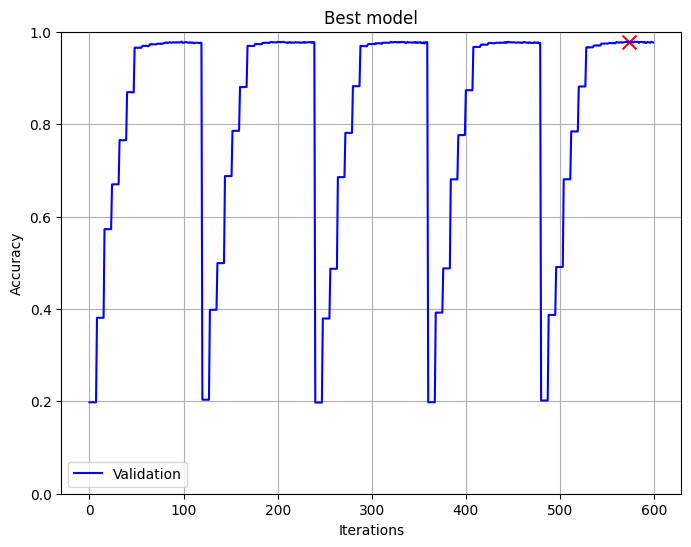

In [ ]:
plot_tuning_flow(list(range(number_of_combinations)), val_acc, "Best model", "Iterations", "Accuracy", optimum_iter, optimum_val_acc)

Time of execution: 3.9998230934143066
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.98      0.99      0.99       974
           2       0.98      0.98      0.98      1029
           3       0.95      0.94      0.94      1034
           4       0.97      0.98      0.98       930
           5       0.95      0.94      0.95      1028
           6       0.98      0.99      0.99       983
           7       0.99      0.99      0.99       991
           8       0.99      0.99      0.99      1016
           9       0.98      0.98      0.98      1035

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



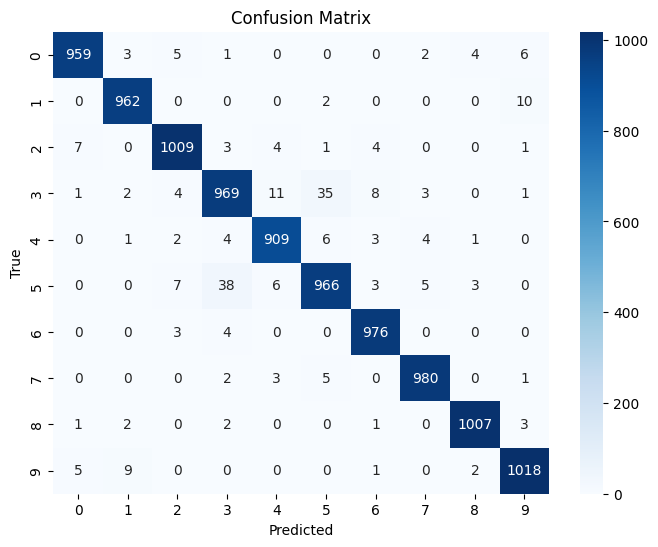

In [ ]:
plot_metrics(best_dt, X1_train, y1_train, X1_test, y1_test)

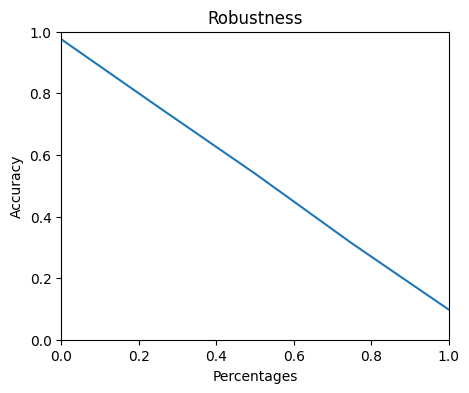

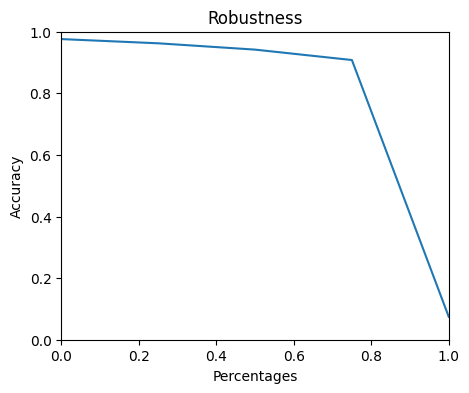

In [ ]:
dt = DecisionTreeClassifier(max_depth = 12, min_samples_split = 4, min_samples_leaf = 2)
# test with noisy only on test set
test_robustness(dt, X1_train, y1_train, X1_test, y1_test, where = 'test')
# test with noisy on train set
test_robustness(dt, X1_train, y1_train, X1_test, y1_test, where = 'train')

### Logistic Regression

In [ ]:
best_lr, best_comb_lr, train_lr_acc, val_lr_acc, test_lr_acc = best_logistic_regression(X1_train, y1_train, X1_test, y1_test)

In [ ]:
number_of_combinations = len(val_lr_acc)
optimum_val_acc = np.max(val_lr_acc)
optimum_iter = np.where(val_lr_acc == optimum_val_acc)[0]
optimum_test_acc = test_lr_acc[optimum_iter.item()]
print(f"Total combinations tried: {number_of_combinations}\nBest performance reached at combination number: {optimum_iter}")
print(f"Best accuracy on validation: {optimum_val_acc}\nCorresponding to accuracy on test set: {optimum_test_acc}")
print(f"Best combination of hyperparameters:\n(best C = {best_comb_lr[0]}, best penalty = {best_comb_lr[1]}, best max_iter = {best_comb_lr[2]})")

Total combinations tried: 300
Best performance reached at combination number: [89]
Best accuracy on validation: 0.988875
Corresponding to accuracy on test set: 0.9862
Best combination of hyperparameters:
(best C = 1.0, best penalty = l2, best max_iter = 5)


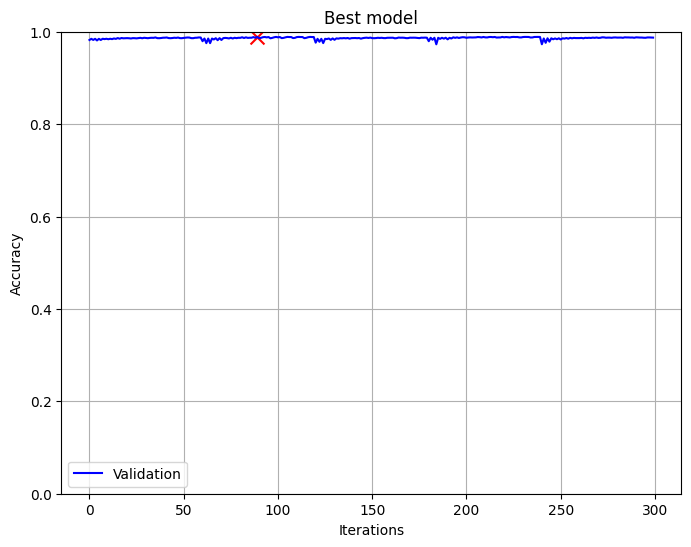

In [ ]:
plot_tuning_flow(list(range(number_of_combinations)), val_lr_acc, "Best model", "Iterations", "Accuracy", optimum_iter, optimum_val_acc)

Time of execution: 15.404021978378296
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       974
           1       0.99      0.99      0.99       979
           2       0.99      0.99      0.99      1026
           3       0.96      0.96      0.96      1017
           4       0.99      0.98      0.99       942
           5       0.96      0.96      0.96      1022
           6       0.99      0.99      0.99       993
           7       0.99      0.99      0.99       991
           8       1.00      1.00      1.00      1015
           9       1.00      1.00      1.00      1041

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



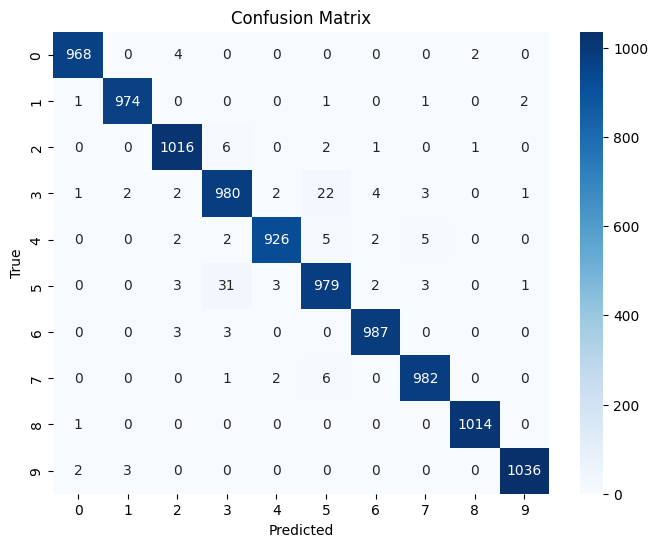

In [ ]:
plot_metrics(best_lr, X1_train, y1_train, X1_test, y1_test)

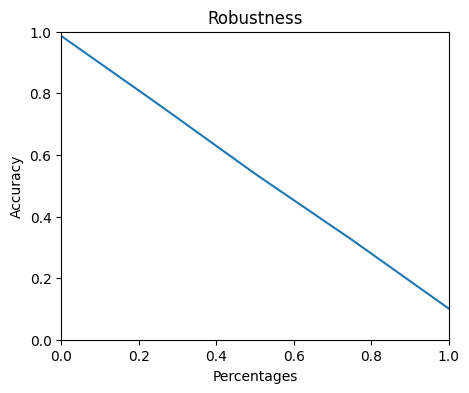

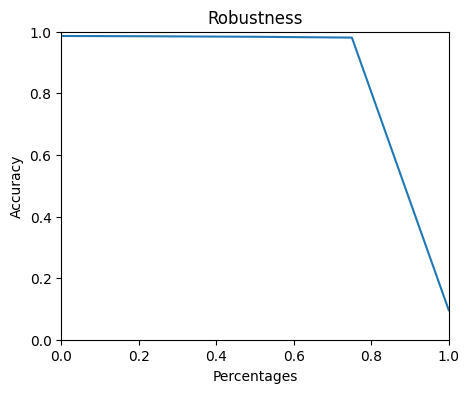

In [ ]:
lr = LogisticRegression(C = 1.0, penalty = 'l2', max_iter = 5)
test_robustness(lr, X1_train, y1_train, X1_test, y1_test, where='test')
test_robustness(lr, X1_train, y1_train, X1_test, y1_test, where='train')

### Support Vector Machine

In [ ]:
best_svm, best_comb_svm, train_svm_acc, val_svm_acc, test_svm_acc = best_svm(X1_train, y1_train, X1_test, y1_test)

In [ ]:
number_of_combinations = len(val_svm_acc)
optimum_val_acc = np.max(val_svm_acc)
optimum_iter = np.where(val_svm_acc == optimum_val_acc)[0]
optimum_test_acc = test_lr_acc[optimum_iter.item()]
print(f"Total combinations tried: {number_of_combinations}\nBest performance reached at combination number: {optimum_iter}")
print(f"Best accuracy on validation: {optimum_val_acc}\nCorresponding to accuracy on test set: {optimum_test_acc}")
print(f"Best combination of hyperparameters:\n(best kernel = {best_comb_svm[0]}, best degree = {best_comb_svm[1]})")

Total combinations tried: 30
Best performance reached at combination number: [10]
Best accuracy on validation: 0.989375
Corresponding to accuracy on test set: 0.9827
Best combination of hyperparameters:
(best kernel = poly, best degree = 2)


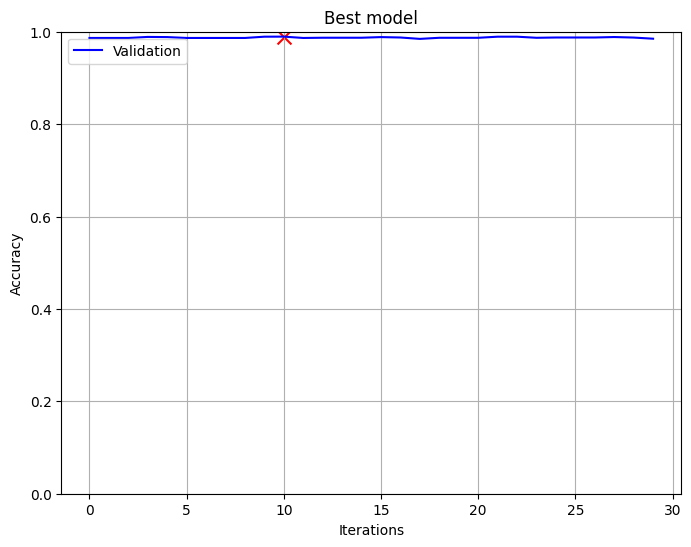

In [ ]:
plot_tuning_flow(list(range(number_of_combinations)), val_svm_acc, "Best model", "Iterations", "Accuracy", optimum_iter, optimum_val_acc)

Time of execution: 9.549432754516602
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       972
           1       0.99      1.00      1.00       977
           2       0.99      1.00      0.99      1020
           3       0.96      0.95      0.96      1032
           4       0.99      0.99      0.99       933
           5       0.97      0.96      0.96      1024
           6       0.99      1.00      0.99       994
           7       0.99      0.99      0.99       992
           8       1.00      1.00      1.00      1018
           9       0.99      0.99      0.99      1038

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



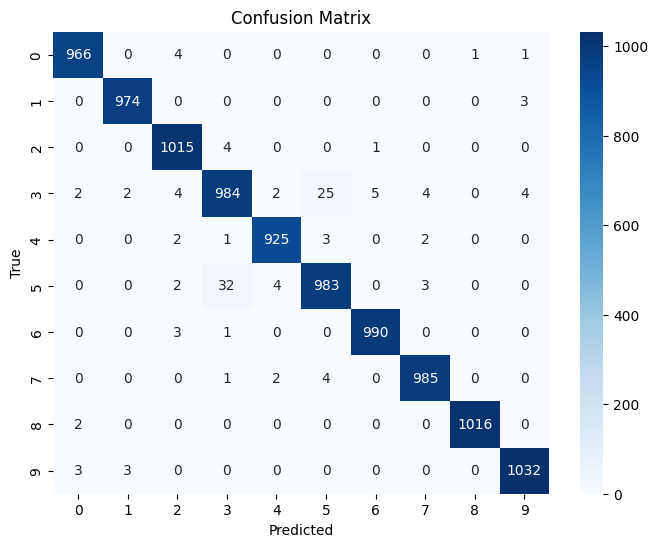

In [ ]:
plot_metrics(best_svm, X1_train, y1_train, X1_test, y1_test)

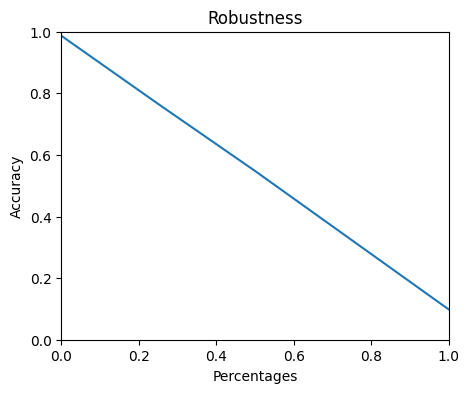

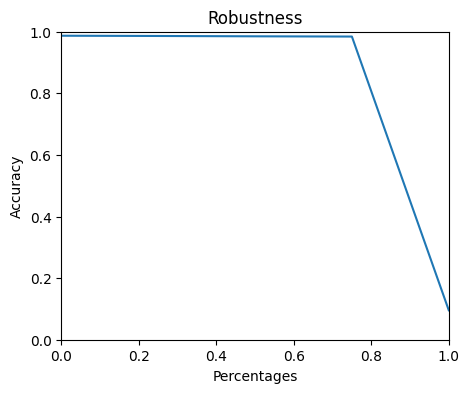

In [ ]:
svm = SVC(kernel = 'poly', degree = 2)
test_robustness(svm, X1_train, y1_train, X1_test, y1_test, where='test')
test_robustness(svm, X1_train, y1_train, X1_test, y1_test, where='train')

### Ensamble Methods

In [ ]:
BEST_DEPTH_1 = 12
BEST_SPLIT_1 = 4
BEST_LEAF_1 = 1
BEST_C_1 = 1
BEST_ITER = 5
BEST_PENALTY = 'l2'
BEST_KERNEL_1 = 'poly'
BEST_DEGREE_1 = 2

Results of Ensamble Methods without normalized data

Time of execution: 10.007123231887817
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       978
           1       1.00      0.99      0.99       982
           2       0.99      1.00      0.99      1019
           3       0.95      0.96      0.96      1014
           4       0.99      0.99      0.99       938
           5       0.97      0.96      0.96      1031
           6       0.99      0.99      0.99       995
           7       0.99      0.99      0.99       994
           8       1.00      1.00      1.00      1017
           9       0.99      1.00      0.99      1032

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



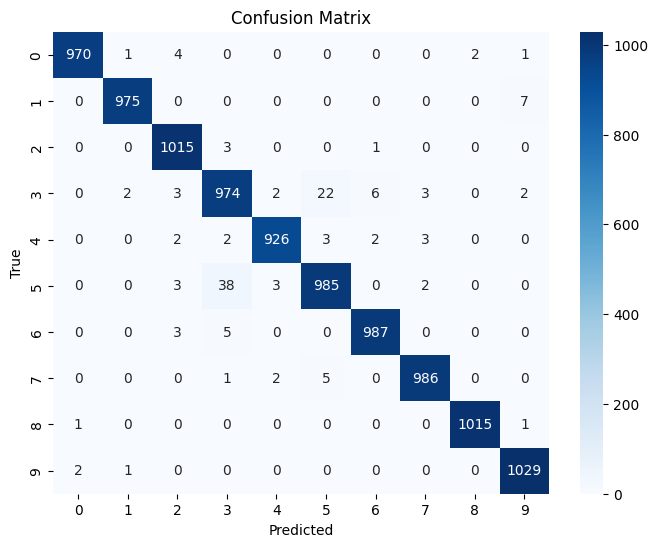

In [ ]:
print(f"Results of Ensamble Methods without normalized data\n")
best_decision_tree = DecisionTreeClassifier(max_depth = BEST_DEPTH_1, min_samples_split = BEST_SPLIT_1, min_samples_leaf = BEST_LEAF_1)
best_logistic_regression = LogisticRegression(penalty = BEST_PENALTY, max_iter = BEST_ITER, C = 1)
best_svm = SVC(kernel = BEST_KERNEL_1, degree = BEST_DEGREE_1)
voting_classifier = VotingClassifier(estimators=[
    ('decision_tree', best_decision_tree),
    ('logistic_regression', best_logistic_regression),
    ('svm', best_svm)
], voting='hard')

plot_metrics(voting_classifier, X1_train, y1_train, X1_test, y1_test)


Results of Ensamble Methods with normalized data

Time of execution: 12.631059408187866
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       974
           1       0.99      1.00      0.99       977
           2       0.99      1.00      0.99      1020
           3       0.96      0.95      0.96      1034
           4       0.99      0.99      0.99       936
           5       0.97      0.96      0.97      1017
           6       0.99      1.00      0.99       992
           7       0.99      0.99      0.99       993
           8       1.00      1.00      1.00      1017
           9       0.99      0.99      0.99      1040

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



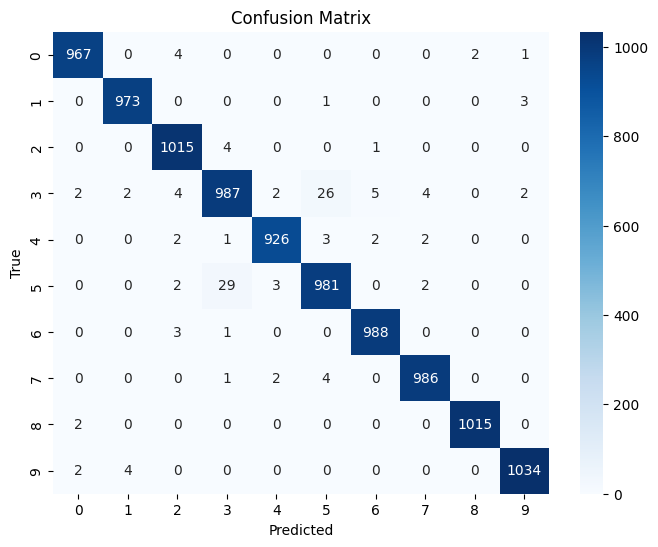

In [ ]:
print(f"Results of Ensamble Methods with normalized data\n")
best_decision_tree = DecisionTreeClassifier(max_depth = BEST_DEPTH_1, min_samples_split = BEST_SPLIT_1, min_samples_leaf = BEST_LEAF_1)
best_logistic_regression = LogisticRegression(penalty = BEST_PENALTY, max_iter = BEST_ITER, C = 1)
best_svm = SVC(kernel = BEST_KERNEL_1, degree = BEST_DEGREE_1)
voting_classifier = VotingClassifier(estimators=[
    ('decision_tree', best_decision_tree),
    ('logistic_regression', best_logistic_regression),
    ('svm', best_svm)
], voting='hard')

plot_metrics(voting_classifier, X1_train, y1_train, X1_test, y1_test)



## Dataset 2


### Decision Trees

In [ ]:
best_dt_2, best_comb_2, train_acc_dt_2, val_acc_dt_2, test_acc_dt_2 = best_decision_tree(X2_train, y2_train, X2_test, y2_test)

In [ ]:
number_of_combinations = len(val_acc_dt_2)
optimum_val_acc = np.max(val_acc_dt_2)
optimum_iter = np.where(val_acc_dt_2 == optimum_val_acc)[0]
optimum_test_acc = test_acc_dt_2[optimum_iter.item()]

print(f"Total combinations tried: {number_of_combinations}\nBest performance reached at combination number: {optimum_iter}")
print(f"Best accuracy on validation: {optimum_val_acc}\nCorresponding to accuracy on test set: {optimum_test_acc}")
print(f"Best combination of hyperparameters:\n(best depth = {best_comb_2[0]}, best split = {best_comb_2[1]}, best leaf = {best_comb_2[2]})")

Total combinations tried: 600
Best performance reached at combination number: [463]
Best accuracy on validation: 0.9615
Corresponding to accuracy on test set: 0.9531
Best combination of hyperparameters:
(best depth = 13, best split = 5, best leaf = 2)


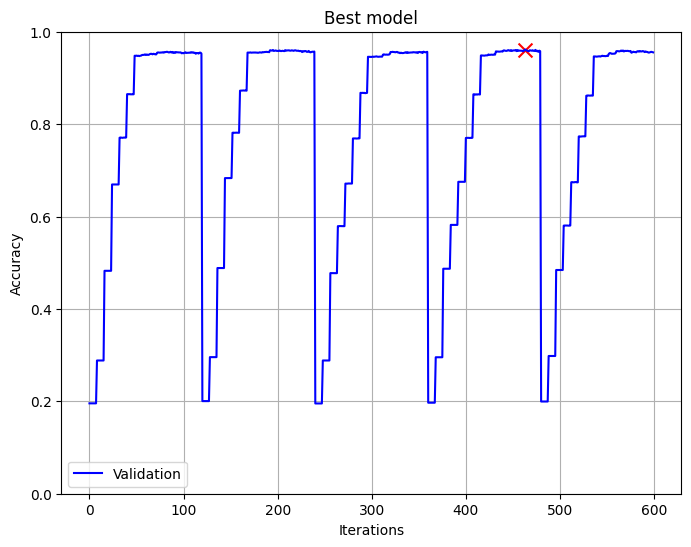

In [ ]:
plot_tuning_flow(list(range(number_of_combinations)), val_acc_dt_2, "Best model", "Iterations", "Accuracy", optimum_iter, optimum_val_acc)

Time of execution: 51.33201336860657
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       991
           1       0.98      0.98      0.98       977
           2       0.95      0.95      0.95      1021
           3       0.89      0.89      0.89      1021
           4       0.96      0.96      0.96       936
           5       0.90      0.90      0.90      1023
           6       0.98      0.97      0.97       999
           7       0.96      0.98      0.97       977
           8       0.98      0.99      0.99      1015
           9       0.98      0.98      0.98      1040

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



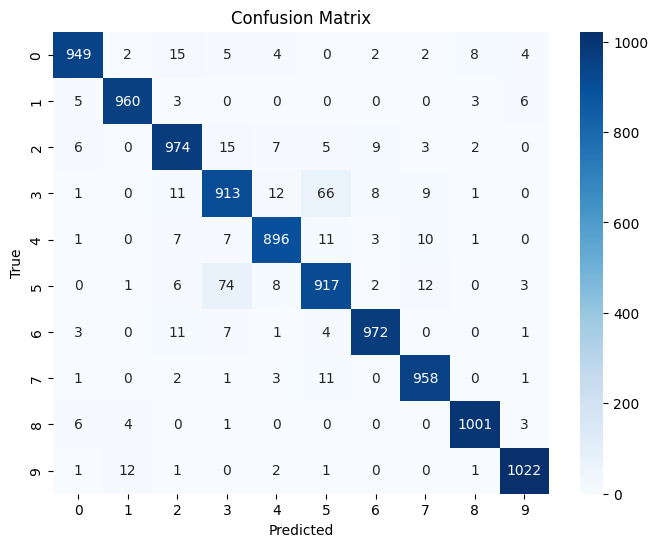

In [ ]:
plot_metrics(best_dt_2, X2_train, y2_train, X2_test, y2_test)

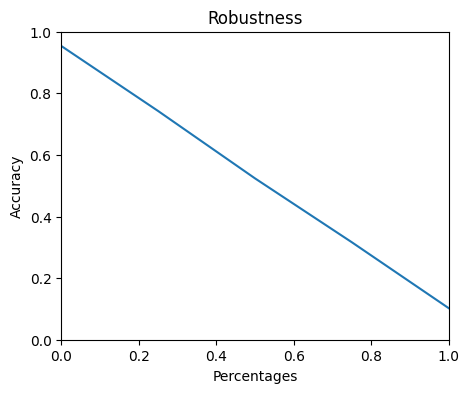

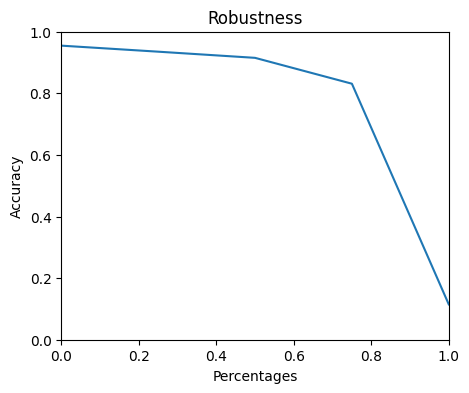

In [ ]:
dt = DecisionTreeClassifier(max_depth = 13, min_samples_split = 5, min_samples_leaf = 2)
# test with noisy only on test set
test_robustness(dt, X2_train, y2_train, X2_test, y2_test, where = 'test')
# test with noisy on train set
test_robustness(dt, X2_train, y2_train, X2_test, y2_test, where = 'train')

### Logistic Regression


In [ ]:
best_lr_2, best_comb_lr_2, train_lr_acc_2, val_lr_acc_2, test_lr_acc_2 = best_logistic_regression(X2_train, y2_train, X2_test, y2_test)

In [ ]:
number_of_combinations = len(val_lr_acc_2)
optimum_val_acc = np.max(val_lr_acc_2)
optimum_iter = np.where(val_lr_acc_2 == optimum_val_acc)[0]
optimum_test_acc = test_lr_acc_2[optimum_iter.item()]
print(f"Total combinations tried: {number_of_combinations}\nBest performance reached at combination number: {optimum_iter}")
print(f"Best accuracy on validation: {optimum_val_acc}\nCorresponding to accuracy on test set: {optimum_test_acc}")
print(f"Best combination of hyperparameters:\n(best C = {best_comb_lr_2[0]}, best penalty = {best_comb_lr_2[1]}, best max_iter = {best_comb_lr_2[2]})")

Total combinations tried: 300
Best performance reached at combination number: [217]
Best accuracy on validation: 0.976
Corresponding to accuracy on test set: 0.9713
Best combination of hyperparameters:
(best C = 0.01, best penalty = l2, best max_iter = 7)


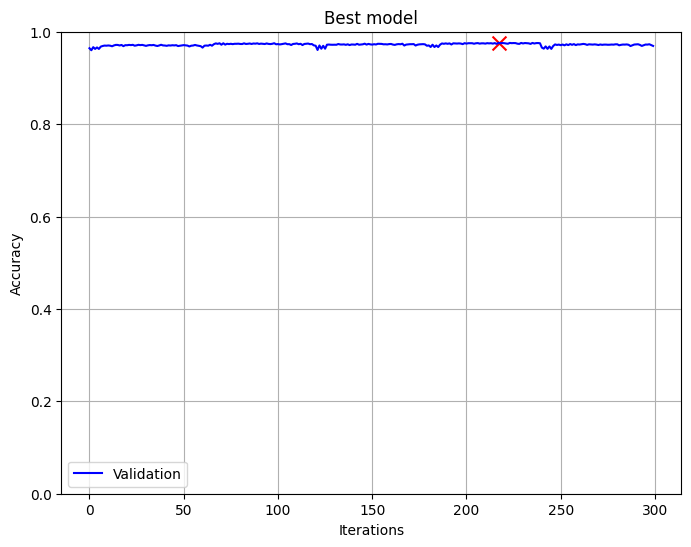

In [ ]:
plot_tuning_flow(list(range(number_of_combinations)), val_lr_acc_2, "Best model", "Iterations", "Accuracy", optimum_iter, optimum_val_acc)

Time of execution: 219.3880832195282
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       989
           1       0.98      0.99      0.99       970
           2       0.96      0.98      0.97      1005
           3       0.91      0.93      0.92      1003
           4       0.98      0.96      0.97       955
           5       0.93      0.92      0.92      1024
           6       0.99      0.99      0.99      1003
           7       0.98      0.98      0.98       990
           8       0.99      0.99      0.99      1017
           9       0.99      0.99      0.99      1044

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



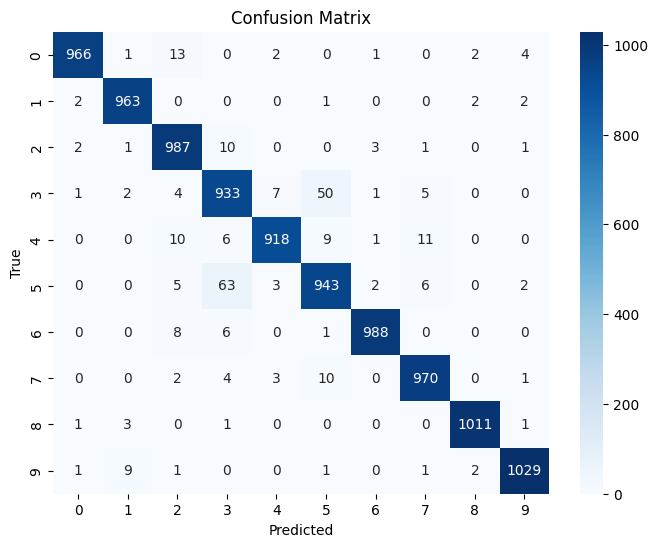

In [ ]:
plot_metrics(best_lr_2, X2_train, y2_train, X2_test, y2_test)

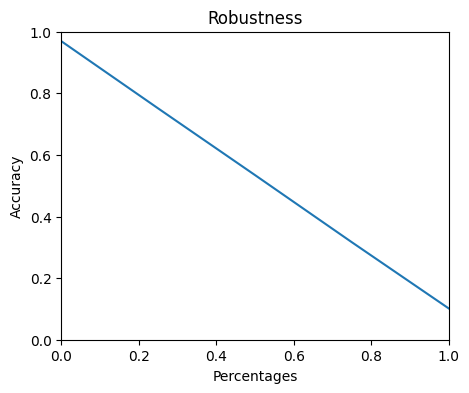

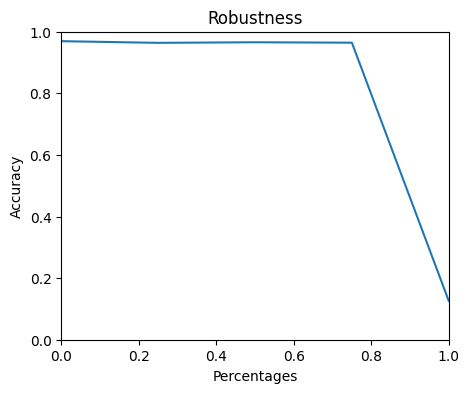

In [ ]:
lr = LogisticRegression(C = 0.01, penalty = 'l2', max_iter = 7)
test_robustness(lr, X2_train, y2_train, X2_test, y2_test, where='test')
test_robustness(lr, X2_train, y2_train, X2_test, y2_test, where='train')

### Support Vector Machine

In [ ]:
best_svm_2, best_comb_svm_2, train_svm_acc_2, val_svm_acc_2, test_svm_acc_2 = best_svm(X2_train, y2_train, X2_test, y2_test)

In [ ]:
number_of_combinations = len(val_svm_acc_2)
optimum_val_acc = np.max(val_svm_acc_2)
optimum_iter = np.where(val_svm_acc_2 == optimum_val_acc)[0]
optimum_test_acc = test_svm_acc_2[optimum_iter.item()]
print(f"Total combinations tried: {number_of_combinations}\nBest performance reached at combination number: {optimum_iter}")
print(f"Best accuracy on validation: {optimum_val_acc}\nCorresponding to accuracy on test set: {optimum_test_acc}")
print(f"Best combination of hyperparameters:\n(best kernel = {best_comb_svm_2[0]}, best degree = {best_comb_svm_2[1]})")

Total combinations tried: 30
Best performance reached at combination number: [10]
Best accuracy on validation: 0.975375
Corresponding to accuracy on test set: 0.9708
Best combination of hyperparameters:
(best kernel = poly, best degree = 2)


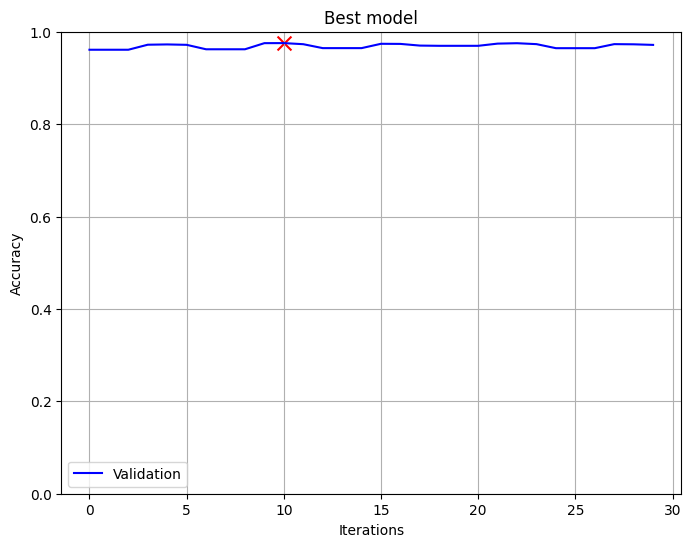

In [ ]:
plot_tuning_flow(list(range(number_of_combinations)), val_svm_acc_2, "Best model", "Iterations", "Accuracy", optimum_iter, optimum_val_acc)

Time of execution: 69.91948246955872
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       986
           1       0.99      0.99      0.99       970
           2       0.96      0.98      0.97      1006
           3       0.92      0.92      0.92      1024
           4       0.98      0.96      0.97       953
           5       0.92      0.93      0.93      1012
           6       0.99      0.99      0.99      1001
           7       0.98      0.98      0.98       989
           8       1.00      0.99      0.99      1020
           9       0.99      0.99      0.99      1039

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



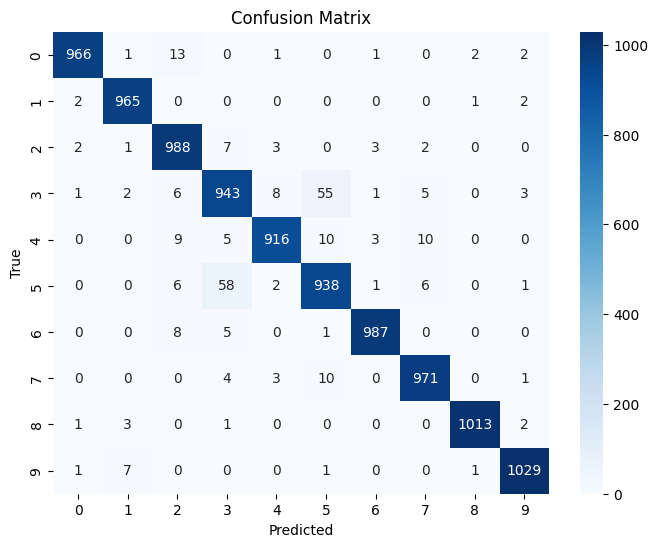

In [ ]:
plot_metrics(best_svm_2, X2_train, y2_train, X2_test, y2_test)

In [ ]:
svm = SVC(kernel = 'poly', degree = 2)
test_robustness(svm, X2_train, y2_train, X2_test, y2_test, where='test')

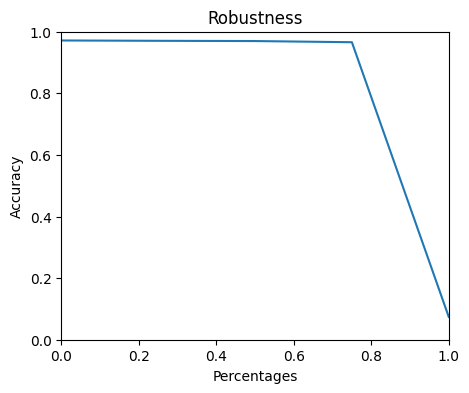

In [ ]:
test_robustness(svm, X2_train, y2_train, X2_test, y2_test, where='train')

### Ensamble Methods

In [ ]:
BEST_DEPTH_2 = 13
BEST_SPLIT_2 = 5
BEST_LEAF_2 = 2
BEST_C_2 = 0.01
BEST_ITER_2 = 7
BEST_PENALTY = 'l2'
BEST_KERNEL_2 = 'poly'
BEST_DEGREE_2 = 2

Results of ensamble methods without normalized data
Time of execution: 143.32980871200562
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       990
           1       0.99      0.99      0.99       973
           2       0.96      0.98      0.97      1005
           3       0.92      0.92      0.92      1019
           4       0.98      0.96      0.97       956
           5       0.93      0.92      0.92      1021
           6       0.99      0.99      0.99      1001
           7       0.97      0.98      0.98       982
           8       0.99      0.99      0.99      1018
           9       0.99      0.99      0.99      1035

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



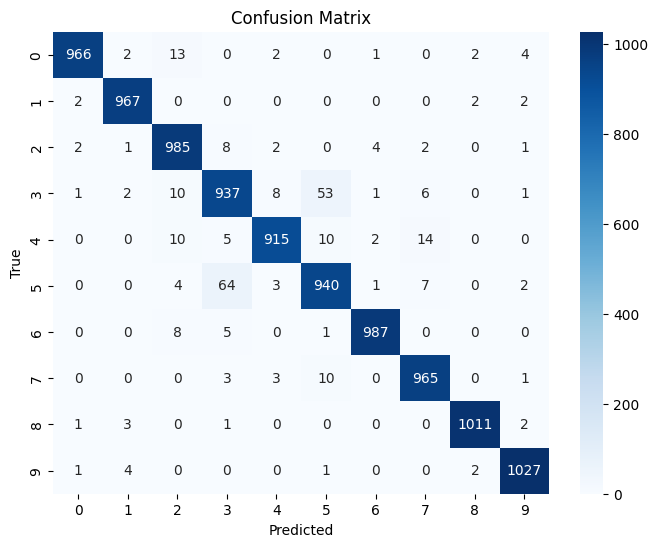

In [ ]:
print("Results of ensamble methods without normalized data")
best_decision_tree_2 = DecisionTreeClassifier(max_depth = BEST_DEPTH_2, min_samples_split = BEST_SPLIT_2, min_samples_leaf = BEST_LEAF_2)
best_logistic_regression_2 = LogisticRegression(penalty = BEST_PENALTY, max_iter = BEST_ITER_2, C = BEST_C_2)
best_svm_2 = SVC(kernel = BEST_KERNEL_2, degree = BEST_DEGREE_2)
voting_classifier_2 = VotingClassifier(estimators=[
    ('decision_tree', best_decision_tree_2),
    ('logistic_regression', best_logistic_regression_2),
    ('svm', best_svm_2)
], voting='hard')

plot_metrics(voting_classifier_2, X2_train, y2_train, X2_test, y2_test)


Results of ensamble methods with normalized data
Time of execution: 138.60721731185913
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       991
           1       0.99      0.99      0.99       973
           2       0.96      0.98      0.97      1004
           3       0.92      0.92      0.92      1019
           4       0.98      0.96      0.97       956
           5       0.93      0.92      0.92      1021
           6       0.99      0.99      0.99      1001
           7       0.97      0.98      0.98       982
           8       0.99      0.99      0.99      1018
           9       0.99      0.99      0.99      1035

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



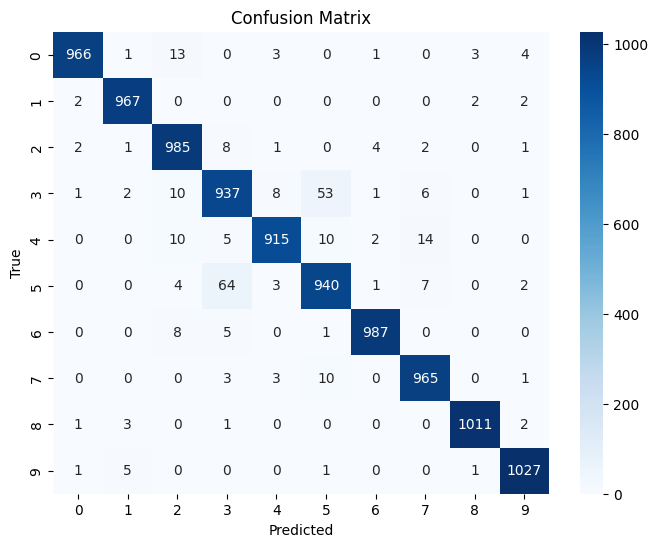

In [ ]:
print("Results of ensamble methods with normalized data")
best_decision_tree_2 = DecisionTreeClassifier(max_depth = BEST_DEPTH_2, min_samples_split = BEST_SPLIT_2, min_samples_leaf = BEST_LEAF_2)
best_logistic_regression_2 = LogisticRegression(penalty = BEST_PENALTY, max_iter = BEST_ITER_2, C = BEST_C_2)
best_svm_2 = SVC(kernel = BEST_KERNEL_2, degree = BEST_DEGREE_2)
voting_classifier_2 = VotingClassifier(estimators=[
    ('decision_tree', best_decision_tree_2),
    ('logistic_regression', best_logistic_regression_2),
    ('svm', best_svm_2)
], voting='hard')

plot_metrics(voting_classifier_2, X2_train, y2_train, X2_test, y2_test)


# Blind set

In [ ]:
from sklearn.cluster import KMeans
import csv
from google.colab import files

In [ ]:
def save_results(predictions, file_name):

  csv_file = file_name

  with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    for row in predictions:
        writer.writerow([row])

  csv_file_path = "/content/"+str(file_name)
  files.download(csv_file_path)

  return csv_file

## Blind set 1

### Loading

In [ ]:
path_blind_dataset1 = "/content/drive/MyDrive/AIRO/anno1/semestre1/ML/homework1/data/Copia di blind_test1.csv"
X1_blind, Y1_blind = load_data(path_blind_dataset1)

In [ ]:
print(f"X1 blind shape: {X1_blind.shape}")

X1 blind shape: (10000, 100)


### Visualization

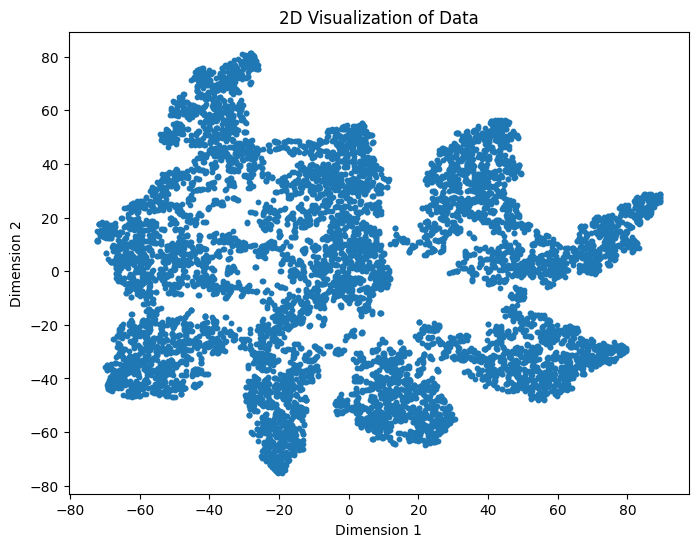

In [ ]:
visualize_data(X1_blind)

### Normalization

In [ ]:
X1_blind_norm = normalize_data(X1_blind)

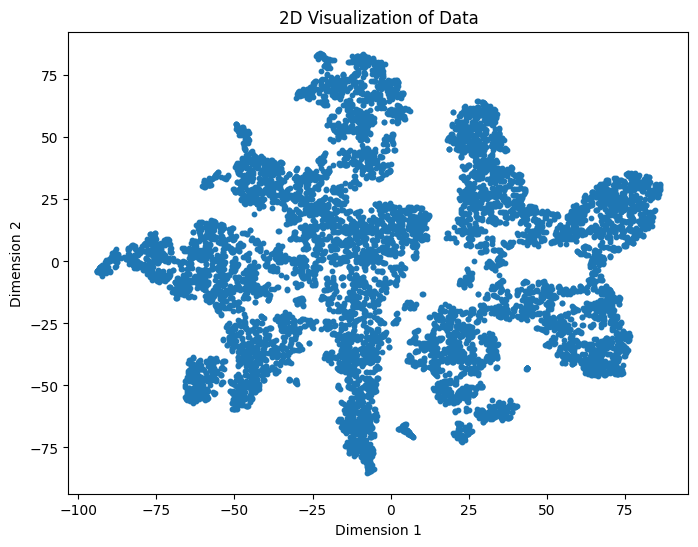

In [ ]:
visualize_data(X1_blind_norm)

### Ensamble Method

In [ ]:
BEST_DEPTH_1 = 12
BEST_SPLIT_1 = 4
BEST_LEAF_1 = 1
BEST_C_1 = 1
BEST_ITER = 5
BEST_PENALTY = 'l2'
BEST_KERNEL_1 = 'poly'
BEST_DEGREE_1 = 2

In [ ]:
best_decision_tree = DecisionTreeClassifier(max_depth = BEST_DEPTH_1, min_samples_split = BEST_SPLIT_1, min_samples_leaf = BEST_LEAF_1)
best_logistic_regression = LogisticRegression(penalty = BEST_PENALTY, max_iter = BEST_ITER, C = 1)
best_svm = SVC(kernel = BEST_KERNEL_1, degree = BEST_DEGREE_1)
voting_classifier = VotingClassifier(estimators=[
    ('decision_tree', best_decision_tree),
    ('logistic_regression', best_logistic_regression),
    ('svm', best_svm)
], voting='hard')


In [ ]:
voting_classifier.fit(X1_train, y1_train)
pred_blind_1 = voting_classifier.predict(X1_blind_norm)

In [ ]:
save_results(pred_blind_1, "d1_1892079.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'd1_1892079.csv'

## Blind Set 2

### Loading

In [ ]:
path_blind_dataset2 = "/content/drive/MyDrive/AIRO/anno1/semestre1/ML/homework1/data/Copia di blind_test2.csv"
X2_blind, Y2_blind = load_data(path_blind_dataset2)

In [ ]:
print(f"X2 blind shape: {X2_blind.shape}")

X2 blind shape: (10000, 1000)


### Visualization

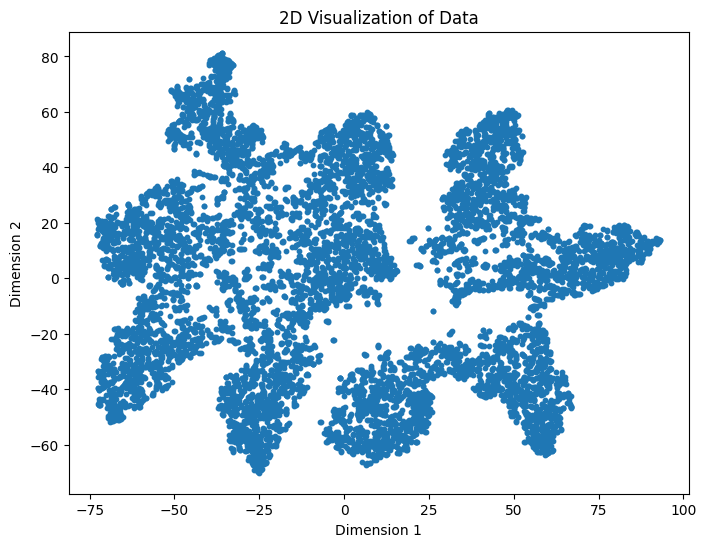

In [ ]:
visualize_data(X2_blind)

### Normalization


In [ ]:
X2_blind_norm = normalize_data(X2_blind)

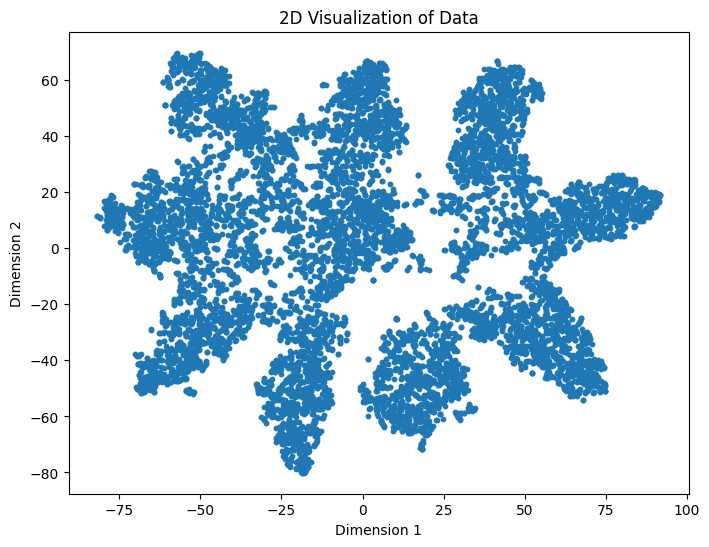

In [ ]:
visualize_data(X2_blind_norm)

### Ensamble Methods

In [ ]:
BEST_DEPTH_2 = 13
BEST_SPLIT_2 = 5
BEST_LEAF_2 = 2
BEST_C_2 = 0.01
BEST_ITER_2 = 7
BEST_PENALTY = 'l2'
BEST_KERNEL_2 = 'poly'
BEST_DEGREE_2 = 2

In [ ]:
best_decision_tree_2 = DecisionTreeClassifier(max_depth = BEST_DEPTH_2, min_samples_split = BEST_SPLIT_2, min_samples_leaf = BEST_LEAF_2)
best_logistic_regression_2 = LogisticRegression(penalty = BEST_PENALTY, max_iter = BEST_ITER_2, C = BEST_C_2)
best_svm_2 = SVC(kernel = BEST_KERNEL_2, degree = BEST_DEGREE_2)
voting_classifier_2 = VotingClassifier(estimators=[
    ('decision_tree', best_decision_tree_2),
    ('logistic_regression', best_logistic_regression_2),
    ('svm', best_svm_2)
], voting='hard')


In [ ]:
voting_classifier.fit(X2_train, y2_train)
pred_blind_2 = voting_classifier.predict(X2_blind_norm)

In [ ]:
save_results(pred_blind_2, "d2_1892079.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'd2_1892079.csv'